In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeRegressor  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

In [2]:
df_loan = pd.read_csv('/content/sample_data/Loan.csv')
df_loan
#print(df_loan.dtypes)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,182,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,Male,Yes,2,Graduate,Yes,16525,1014.0,150,360,1,Rural,Y
1049,Male,Yes,2,Graduate,No,6700,1750.0,230,300,1,Semiurban,Y
1050,Female,Yes,2,Graduate,No,2873,1872.0,132,360,0,Semiurban,N
1051,Male,Yes,1,Graduate,Yes,16667,2250.0,86,360,1,Semiurban,Y


In [3]:
#df_Gender = pd.get_dummies(df_loan['Gender'])
#df_Gender
#df_loan = df_loan.join(df_Gender)
#df_loan = df_loan.drop(columns='Gender')
#df_loan['Gender'] = df_loan['Male']

df_loan['Gender'] = df_loan['Gender'].replace("Male",1)
df_loan['Gender'] = df_loan['Gender'].replace("Female",0)

df_loan['Married'] = df_loan['Married'].replace("Yes",1)
df_loan['Married'] = df_loan['Married'].replace("No",0)

df_loan['Dependents'] = df_loan['Dependents'].replace("0",0)
df_loan['Dependents'] = df_loan['Dependents'].replace("1",1)
df_loan['Dependents'] = df_loan['Dependents'].replace("2",2)
df_loan['Dependents'] = df_loan['Dependents'].replace("3+",3)

df_loan['Education'] = df_loan['Education'].replace("Graduate",1)
df_loan['Education'] = df_loan['Education'].replace("Not Graduate",0)

df_loan['Self_Employed'] = df_loan['Self_Employed'].replace("Yes",1)
df_loan['Self_Employed'] = df_loan['Self_Employed'].replace("No",0)


df_loan['Property_Area'] = df_loan['Property_Area'].replace("Urban",1)
df_loan['Property_Area'] = df_loan['Property_Area'].replace("Semiurban",2)
df_loan['Property_Area'] = df_loan['Property_Area'].replace("Rural",3)

df_loan['Loan_Status'] = df_loan['Loan_Status'].replace("Y",1)
df_loan['Loan_Status'] = df_loan['Loan_Status'].replace("N",0)


df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0,1,0.0,5849,0.0,182,360,1,1,1
1,1.0,1,1,1,0.0,4583,1508.0,128,360,1,3,0
2,1.0,1,0,1,1.0,3000,0.0,66,360,1,1,1
3,1.0,1,0,0,0.0,2583,2358.0,120,360,1,1,1
4,1.0,0,0,1,0.0,6000,0.0,141,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1.0,1,2,1,1.0,16525,1014.0,150,360,1,3,1
1049,1.0,1,2,1,0.0,6700,1750.0,230,300,1,2,1
1050,0.0,1,2,1,0.0,2873,1872.0,132,360,0,2,0
1051,1.0,1,1,1,1.0,16667,2250.0,86,360,1,2,1


In [4]:
for (col,data) in df_loan.iteritems():
  df_loan[col] = pd.to_numeric(df_loan[col],errors='coerce')
  df_loan = df_loan.replace(np.nan,0,regex=True)
  df_loan[col] = df_loan[col].apply(int)
  

df_loan


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,182,360,1,1,1
1,1,1,1,1,0,4583,1508,128,360,1,3,0
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,0,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1,1,2,1,1,16525,1014,150,360,1,3,1
1049,1,1,2,1,0,6700,1750,230,300,1,2,1
1050,0,1,2,1,0,2873,1872,132,360,0,2,0
1051,1,1,1,1,1,16667,2250,86,360,1,2,1


In [5]:
print(df_loan.dtypes)

Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
dtype: object


In [6]:
df_loan = df_loan.loc[df_loan.index.isin([i for i in range(1000)])]

In [7]:
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    min_samples_split=4,
    max_depth = 5 
)

# CART algorithm that builds the tree based on our data
model.fit(
    X=df_loan.drop(columns=['Loan_Status']), 
    y=df_loan['Loan_Status']
)

DecisionTreeRegressor(max_depth=5, min_samples_split=4)

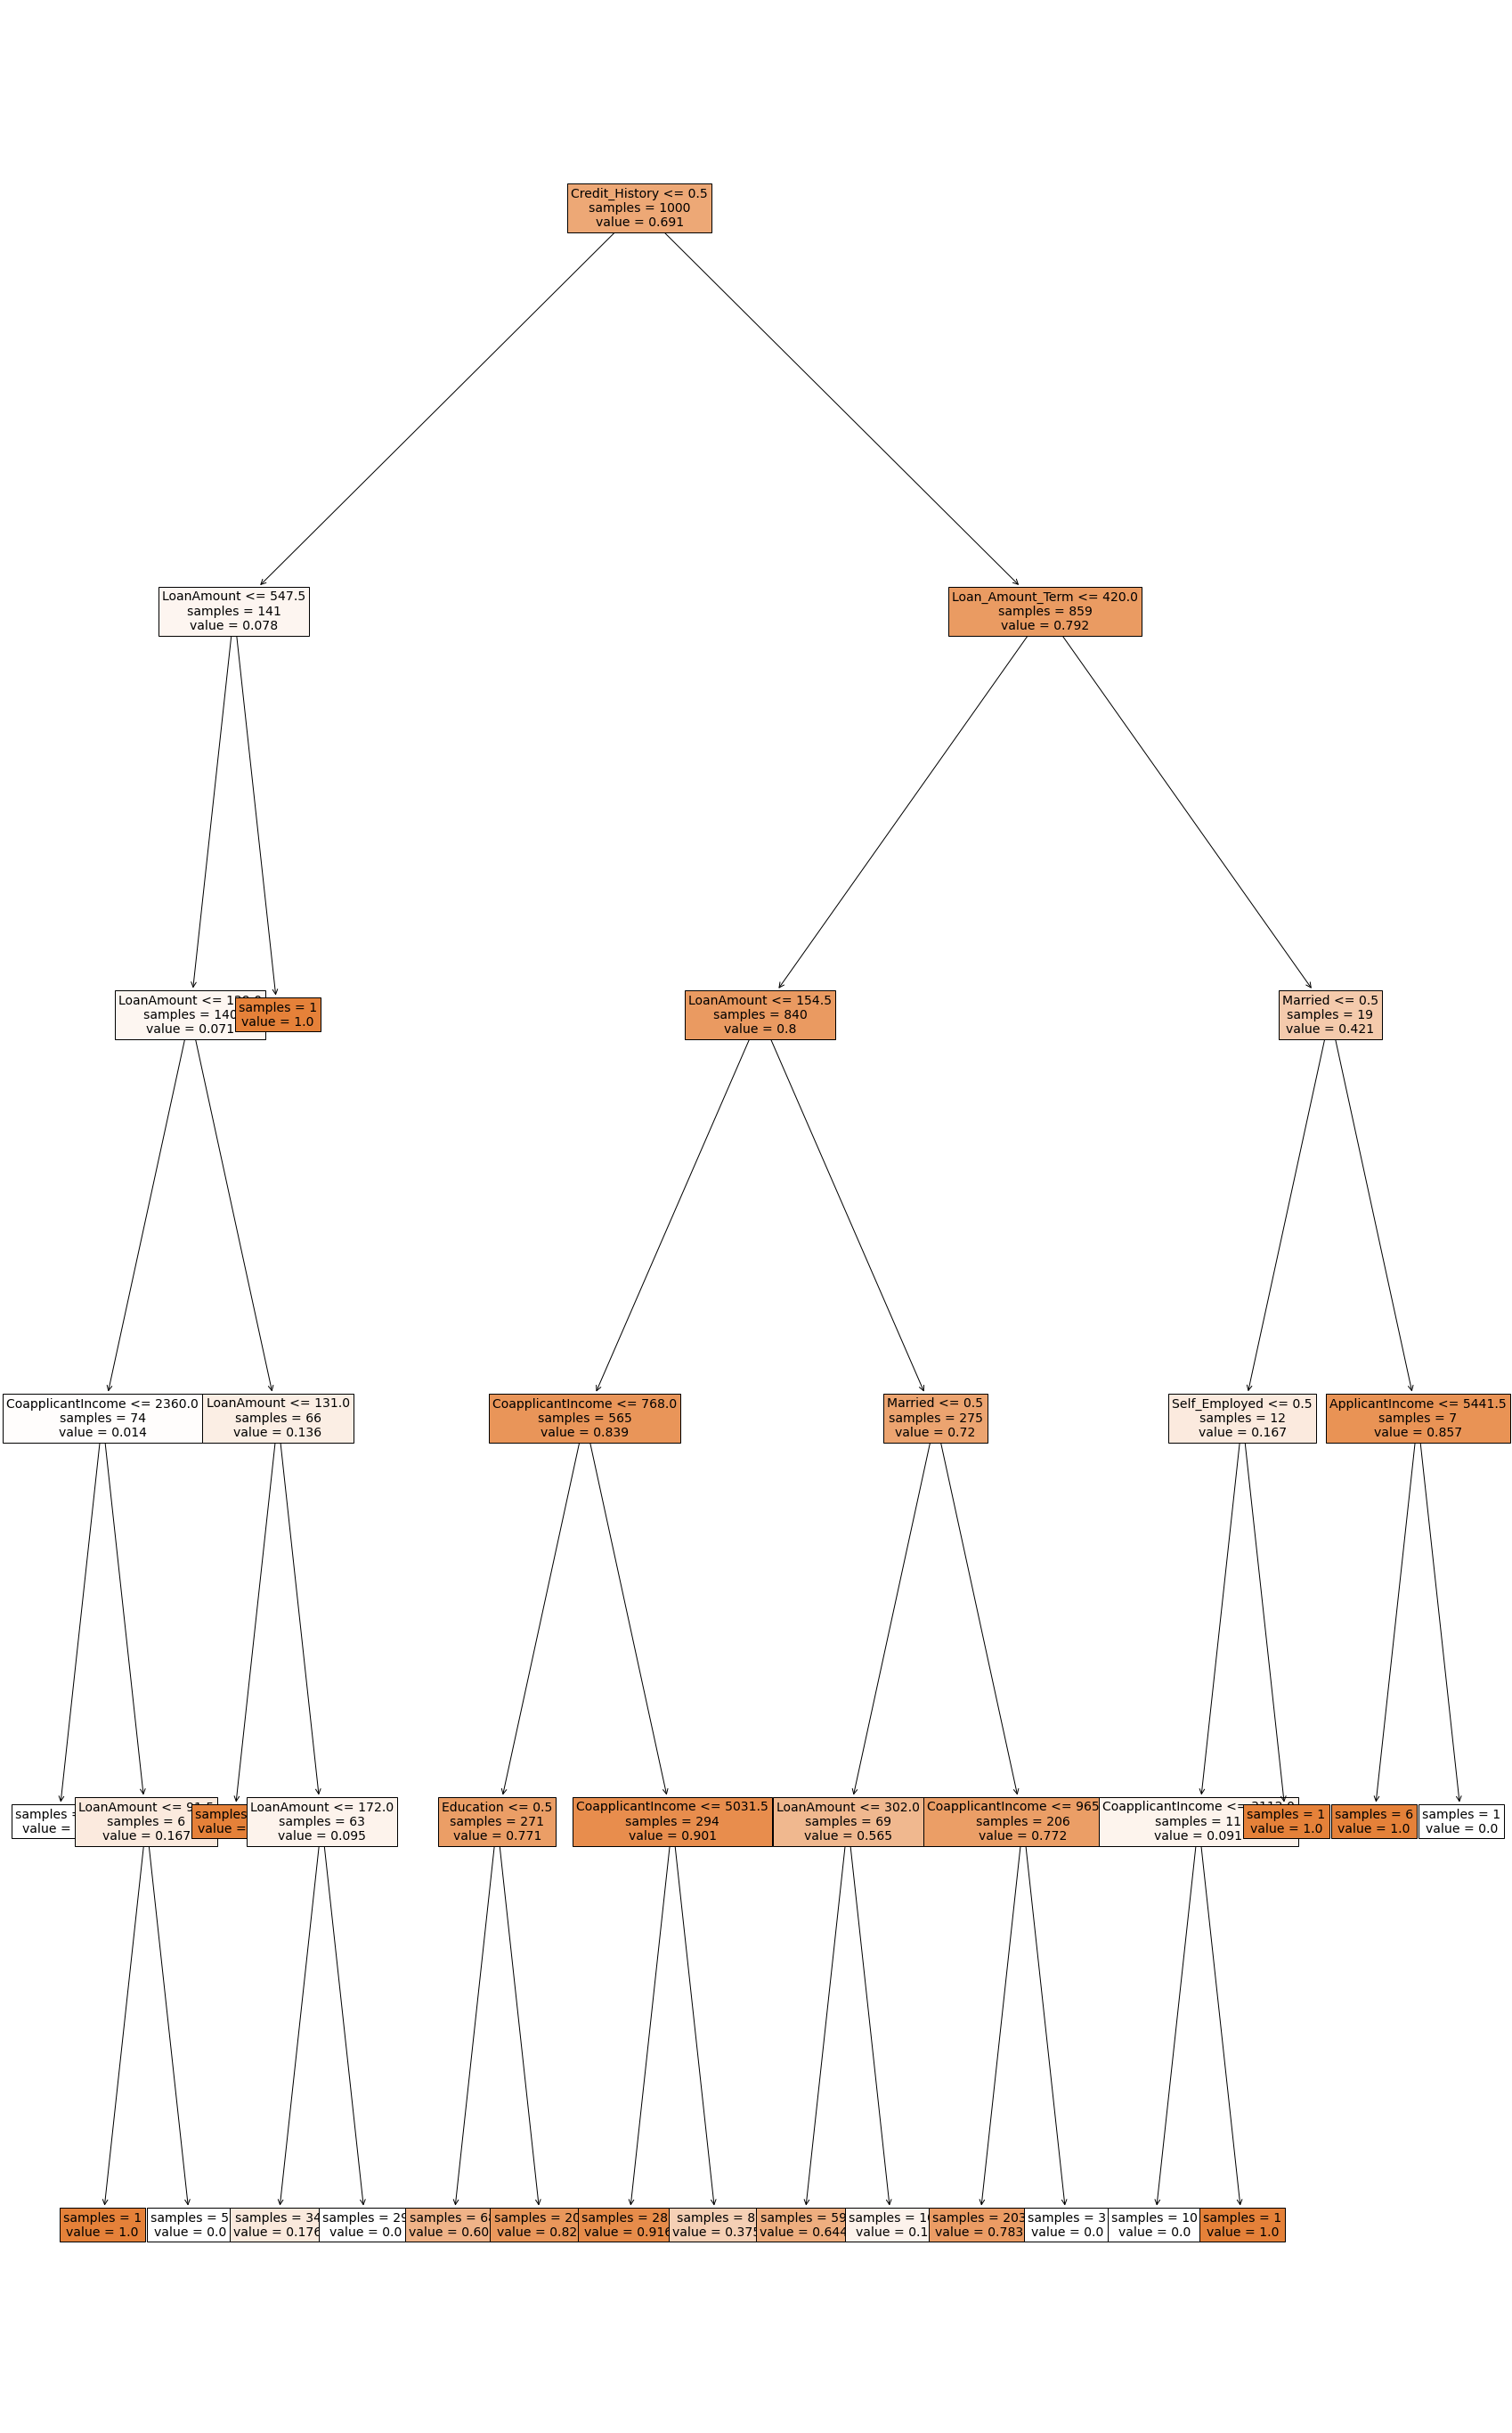

In [9]:
plt.figure(figsize=(30, 50))
plot_tree(
    model,
    feature_names=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],
    impurity=False,
    filled=True,
    fontsize=14
)
plt.show()